In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [36]:
# %matplotlib inline


In [13]:
X = np.array([i*np.pi/180 for i in range(60,300,4)])
y = np.sin(X) + np.random.normal(0,0.15,len(X))

In [15]:
data = pd.DataFrame(np.column_stack([X, y]), columns=['x','y'])

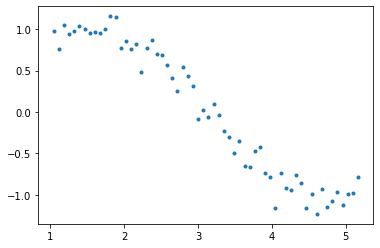

In [28]:
plt.plot(data['x'], data['y'], '.')

In [29]:
for i in range(2, 16):
    colname = 'x{}'.format(i)
    data[colname] = data['x']**i

In [31]:
data.head()

,x,y,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,1.047198,0.972126,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.117011,0.765088,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,1.186824,1.046164,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,1.256637,0.935136,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.326450,0.977816,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170


In [32]:
from sklearn.linear_model import LinearRegression

In [37]:
def linear_regression(data, power, models_to_plot):
    predictors = ['x']
    if power >= 2:
        predictors.extend(['x{}'.format(i) for i in range(2, power+1)])
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors], data['y'])
    y_pred = linreg.predict(data[predictors])
    
     #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

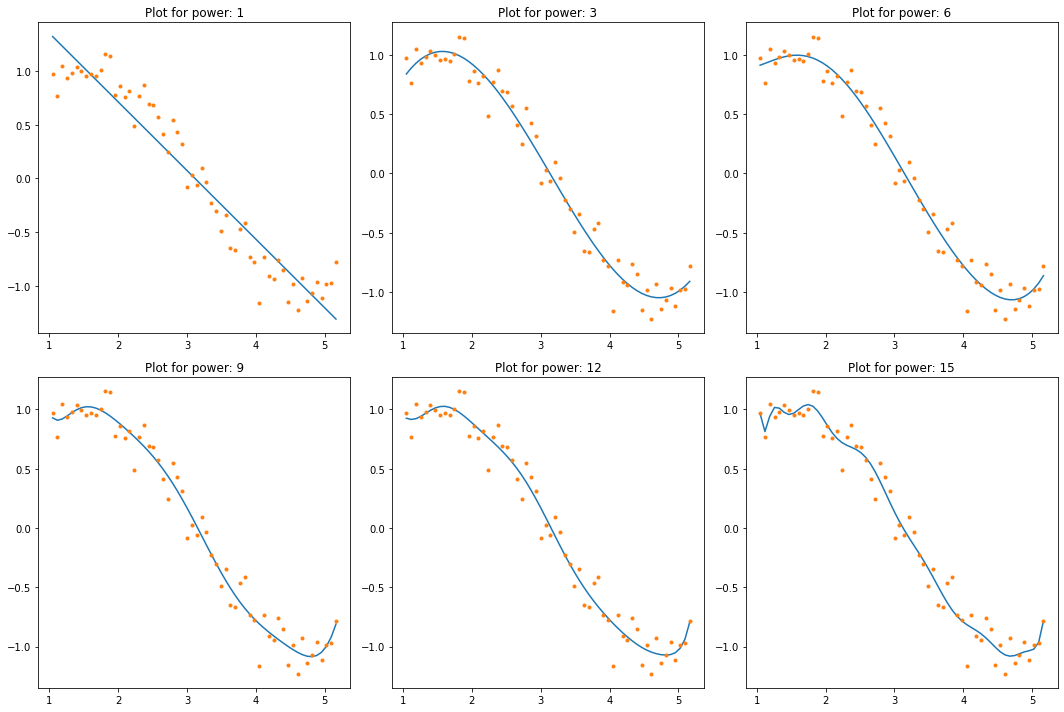

In [41]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}
plt.figure(figsize=(15, 10))
#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)